<div>
    <h1 style="font-family:verdana; text-align:center;">🚵Cyclistic Bike-share Analysis🚵</h1>
    <p style="text-align:center; color:#159364; font-family:cursive; margin-top:-10px; font-size:18px;">Google Data Analytics Capstone Project</p>
    <p style="text-align:center; color:#B37268; font-family:cursive; margin-top:-10px; font-size:14px;"><u>Tools used</u>: Python, Tableau</p>
</div>

***

<p style="font-size:15px; font-family:Helvetica; font-size:17px;">I created this notebook to showcase the result of EDA for the Cyclistic Bike-share capstone project. The project was carried out as part of the Google Data Analytics Professional Certificate program and was built upon the divvy-tripdata dataset. For more information about the course and dataset, please refer to the following links:</p>
<p style="font-size:13px; font-family:Helvetica">
    <a target="_blank" rel="noopener" href="https://www.coursera.org/professional-certificates/google-data-analytics">
       ➡️Google Data Analysis Professional Certificate
    </a>
</p>
<p style="font-size:13px; font-family:Helvetica">
    <a target="_blank" rel="noopener" href="https://divvybikes.com/system-data">
        ➡️Divvy Dataset
    </a>
</p>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


!pip install codebooks
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/2022-divvy-tripdata/codebook.csv
/kaggle/input/2022-divvy-tripdata/cyclists_data_raw.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <font color='289C4E' face="Helvetica" size=6px >Table of contents</font><a class='anchor' id='top'></a>
- [<font face="Helvetica" size=3px>Introduction Cyclistic Bike-share Case Study</font>](#introduction)
- [<font face="Helvetica" size=3px>Divvy Dataset</font>](#dataset)
- [<font face="Helvetica" size=3px>Data Wrangling</font>](#wrangling)
- [<font face="Helvetica" size=3px>Analyzing data</font>](#analyzing)
- [<font face="Helvetica" size=3px>Conclusion</font>](#conclusion)

<div style="font-family: Helvetica; text-align: center; font-size:17px;">
    <h2 style="color: white;
           background-color: #00a1f1;
           font-family: Helvetica;
           border-radius: 5px;
           letter-spacing: 0.5px;
           text-align: center;
           padding: 10px;">Cyclistic Bike-share Case Study <a class='anchor' id='introduction'></a></h2>
    <p style="margin-left: 20px;"><strong>Business task</strong>: Maximize the number of annual memberships by converting casual customers (single-ride and day passes) to members (annual membership).</p>
    <p style="margin-left: 20px;"><strong>Data analysis goal</strong>: Understand how casual riders and annual members use Cyclistic Bike-Share differently.</p>
    <p style="margin-left:20px;"> <a target="_blank" rel="noopener" href="https://d3c33hcgiwev3.cloudfront.net/aacF81H_TsWnBfNR_x7FIg_36299b28fa0c4a5aba836111daad12f1_DAC8-Case-Study-1.pdf?Expires=1691712000&Signature=acyxyY1u1SiYoO6oHqkitaCvlgonWPEqTPV9tcKvMddxTljncSRj6-r826RX46qDje64mEeMeaNCOoactAk9LHAKLUWlexa8OXGuc1axxw8XqOOMdc8uVlGrwCS07~wl5gx5isEjUjutyrpp6Losoyujw6sVCZViCtE1AKLp0wQ_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A">
      For further details about the project, click here
    </a>
    </p>
</div>


<div style="font-family: Helvetica; text-align: center; font-size:17px;">
    <h2 style="color: white;
           background-color: #4285f4;
           font-family: Helvetica;
           border-radius: 5px;
           letter-spacing: 0.5px;
           text-align: center;
           padding: 10px;">Divvy Dataset <a class='anchor' id='dataset'></a></h2>
     <p style="margin-left: 20px;"> In this project, I used the 2022 version of the divvy dataset, which contains 12 file.zip archives for each month of the year. Using the pandas library, I combined these files into a single dataset named <code>cyclists_data_raw.csv</code></p>
    <p style="margin-left: 20px;"> Below, I provide a codebook detailing the dataset (13 variables x 5,667,717 observations), which serves as a comprehensive reference guide for the data's variables, their definitions, and associated values. Using a codebook provides the advantage of enhancing data transparency, clarity, and understanding.</p>
</div>

In [2]:
# use the codebook library to automatically create a codebook, then I customized it as needed.
#!codebooks -o "output.html" "/kaggle/input/2022-divvy-tripdata/cyclists_data_raw.csv"

codebook = pd.read_csv("/kaggle/input/2022-divvy-tripdata/codebook.csv")
css = [
    {
        'selector': 'thead th',
        'props': [
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('border', '1px solid black'),
            ('background-color', 'lightgray')
        ]
    },
    {
        'selector': 'tbody td',
        'props': [
            ('border', '1px solid black'),
            ('padding', '5px'),
            ('text-align', 'center')
        ]
    }
]

In [3]:
codebook.style.set_table_styles(css)

,Variable,Descriptions,Type,%Missing
0,ride_id,unique identifier for each trip,unique key,None
1,rideable_type,"the type of rented vehicle, include electric_bike, classic_bike, docked_bike",categorical,None
2,started_at,the time when the rental period began,datetime,None
3,ended_at,the time when the rental period ended,datetime,None
4,started_station_name,The name of the station where the ride was initiated.,text,14.70%
5,start_staion_id,The unique identifier for the station where the ride began,numeric,14.70%
6,end_station_name,The name of the station where the bike was returned after the rental.,text,15.75%
7,end_station_id,The unique identifier for the station where the bike was returned.,numeric,15.75%
8,start_lat,The latitude coordinate of the starting point of the ride.,float,None
9,start_lng,The longitude coordinate of the starting point of the ride.,float,None


In [4]:
# read data and explore basic information
cyclists_raw = pd.read_csv('/kaggle/input/2022-divvy-tripdata/cyclists_data_raw.csv')

In [5]:
cyclists_raw.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [6]:
cyclists_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [7]:
# check duplicate
cyclists_raw.duplicated().any(), cyclists_raw.duplicated(subset=['ride_id']).any()

(False, False)

<div style="font-family: Helvetica; background-color: #B5C588; color: #F5F5F5; padding: 10px; margin-left: 25px; margin-right: 25px; font-size:17px;">
 <ul>
    <li>Based on the codebook, we can observe that certain columns should be adjusted to their appropriate data types. For instance, "rideable_type" should be transformed into categorical or "start_at" could be converted into a datetime, etc. Assigning suitable data types to these columns could help reduce memory usage and make the data wrangling and analysis stages easier. Additionally, there are several columns with multiple null values. We need to look into them and find a suitable way to handle these null values.</li>
    <li> There is no duplicate values in the dataset. </li>
 </ul>
</div>


<div style="font-family: Helvetica; text-align: center; font-size:17px;">
    <h2 style="color: white;
           background-color: #34a853;
           font-family: Helvetica;
           border-radius: 5px;
           letter-spacing: 0.5px;
           text-align: center;
           padding: 10px;">Data Wrangling <a class='anchor' id='wrangling'></a></h2>
    <p style="margin-left: 20px;"> I did the following tasks: </p>
    <ul style= 'text-align:left; margin-left:30px; margin-top:-7px;'>
        <li> <u>1. Converting columns to appropriate data types</u></li>
            <p style='margin: 3px 0 3px 10px'> - I converted <code>rideable_type</code> and <code>member_casual</code> to categorical; <code>start_at</code>, <code>ended_at</code> to datetime. </p>
        <li> <u>2. Create new columns for analysis</u></li>
            <p style='margin: 3px 0 3px 10px'> - Create the <code>ride_time_minutes</code> column to calculate the length of each trip in minutes. This column is calculated by subtracting the <code>'ended_at'</code> value from the <code>'started_at'</code> value. Additionally, I also extract the hour, day of the week and month from the <code>started_at</code> column. This will enable me to examine some charts (I will show them in the Analysis phrase) from various perspectives, thereby uncovering interesting trends inherent in the data.</p>
        <li> <u>3. Cleaning data </u></li>
            <p style='margin: -3px 0 3px 10px'>- In the original dataset, the <code>rideable_type</code> column contains three values (docked_bike, classic_bike, and electric_bike). However, after reviewing the dataset's documentation and examining similar projects online, I've realized that 'docked_bike' is the former name for 'classic_bike'. Therefore, it's advisable to merge them to ensure consistency.
                <br>- Remove maintaince stations in <code>start_station_name</code> and <code>end_station_name</code>.
                <br>- Classic bikes must be rented and returned at stations. As a result, classic bike trips with null values in both the start and end docking stations should be excluded. Conversely, electric bikes can be locked at any location with a smart lock. Therefore, I replaced null values in start and end docking stations with 'On bike lock' for the electric bike trips.
            </p>
        <li> <u>4. Drop columns and remove null values </u></li>
        <p style='margin: 3px 0 3px 10px'>- I have removed the two columns, <code>start_station_id</code> and <code>end_station_id</code>, as they are unnecessary for the scope of my notebook. Additionally, I am only interested in trips within a one-day duration. Therefore, trips with durations less than 0 minutes and greater than 1440 minutes (24 hours) will be removed.</p>
        <li> <u>5. Double-check and saving the cleaned data </u></li>
        <p style='margin: 3px 0 3px 10px'>- After thorough examination, I have saved the data in parquet format to preserve the data types of the columns. </p>
    </ul>
</div>

### 1. Converting columns to appropriate data types

In [8]:
# Convert rideable_type and member_casual to categorical
cyclists_raw['rideable_type'] = cyclists_raw['rideable_type'].astype('category')
cyclists_raw['member_casual'] = cyclists_raw['member_casual'].astype('category')

# Convert started_at and ended_at to datetime
cyclists_raw['started_at'] = pd.to_datetime(cyclists_raw['started_at'])
cyclists_raw['ended_at'] = pd.to_datetime(cyclists_raw['ended_at'])

### 2. Create new columns for analysis

In [9]:
# adding a new column for duration trips (unit = minutes) (ended_at - started_at)
cyclists_raw['ride_time_minutes'] = ((cyclists_raw['ended_at'] - cyclists_raw['started_at']).dt.total_seconds() / 60).round(2)

# adding columns for weekday, month
cyclists_raw['weekday_started'] = cyclists_raw['started_at'].dt.weekday
cyclists_raw['month_started'] = cyclists_raw['started_at'].dt.month
cyclists_raw['hours'] = cyclists_raw['started_at'].dt.hour

### 3. Cleaning data

In [10]:
# replace docked_bike with classic_bike
cyclists_raw['rideable_type'].replace('docked_bike', 'classic_bike', inplace=True)
cyclists_raw['rideable_type'].value_counts()

electric_bike    2889029
classic_bike     2778688
Name: rideable_type, dtype: int64

In [11]:
# remove maintainence stations in start_station_name and end_station_name
maintainence_station = ['DIVVY CASSETTE REPAIR MOBILE STATION', 'Lyft Driver Center Private Rack', '351', 'Base - 2132 W Hubbard Warehouse', 'Hubbard Bike-checking (LBS-WH-TEST)', 'WEST CHI-WATSON']
cyclists_raw['start_station_name'] = cyclists_raw['start_station_name'].str.upper().str.strip()
cyclists_raw['end_station_name'] = cyclists_raw['end_station_name'].str.upper().str.strip()
cyclists_raw = cyclists_raw[(~cyclists_raw['start_station_name'].isin(maintainence_station)) & (~cyclists_raw['end_station_name'].isin(maintainence_station))]

In [12]:
## remove classic_bike trips with null values in start or end docking station
mask = (cyclists_raw['rideable_type'] == 'classic_bike') & (cyclists_raw['start_station_name'].isnull() | cyclists_raw['end_station_name'].isnull())
cyclists_raw = cyclists_raw[~mask]

In [13]:
## replace null values in start_station_name and end_station_name with 'On bike lock' with electric_bike trips
mask_fillna = cyclists_raw['rideable_type'] == 'electric_bike'
cyclists_raw.loc[mask_fillna, ['start_station_name', 'end_station_name']] = cyclists_raw.loc[mask_fillna, ['start_station_name', 'end_station_name']].fillna('On bike lock')

### 4. Drop columns and remove null values

In [14]:
## start_station_id and end_station_id should be removed
cyclists_raw.drop(['start_station_id', 'end_station_id'], axis=1, inplace=True)

cyclists_raw = cyclists_raw[~((cyclists_raw['ride_time_minutes'] <= 0) | (cyclists_raw['ride_time_minutes'] >= 1440))]

### 5. Double-check and saving the cleaned data

In [15]:
cyclists_raw.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_time_minutes     0
weekday_started       0
month_started         0
hours                 0
dtype: int64

In [16]:
cyclists_raw.duplicated().any()

False

In [17]:
cyclists_raw.to_parquet('cyclists_cleaned.gzip', index=False)
cyclists_cleaned = pd.read_parquet("/kaggle/working/cyclists_cleaned.gzip")

In [18]:
cyclists_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660606 entries, 0 to 5660605
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
 11  ride_time_minutes   float64       
 12  weekday_started     int64         
 13  month_started       int64         
 14  hours               int64         
dtypes: category(2), datetime64[ns](2), float64(5), int64(3), object(3)
memory usage: 572.2+ MB


<div style="font-family: Helvetica; text-align: center; font-size:17px;">
    <h2 style="color: white;
           background-color: #fbbc05;
           font-family: Helvetica;
           border-radius: 5px;
           letter-spacing: 0.5px;
           text-align: center;
           padding: 10px;">Analyzing data<a class='anchor' id='analyzing'></a></h2>
    <p style="margin-left: 20px;"> I have conducted an analysis that revealed some interesting insights into the behaviors of casual riders and members. I also examined the differences in usage patterns between classic bikes and electric bikes for these two user groups. Here are the noteworthy findings:</p>
    <ul style= 'text-align:left; margin-left:30px; margin-top:-7px;'>
        <li> 1. Trips distribution</li>
        <li> 2. Bike type preferences (following the rideable_type: classic_bike and electric_bike)</li>
        <li> 3. Amount of trips (following hours, days of week, months, as well as classic_bike vs. electric_bike)</li>
        <li> 4. Average Ride Time (following hours, days of week, months, as well as classic_bike vs. electric_bike)</li>
        <li> 5. Geospatial analysis</li>
    </ul>
    <p style="margin-left: 20px;"> <strong>Please note that I haven't aimed to make the code for my plots visually appealing; my main focus was to provide code to generate the necessary data</strong>. This data will serve as input for my data analysis in Tableau. I haven't provided explanations for the meanings of the charts either, as you can view them in my Tableau Visualization <a target="_blank" rel="noopener" href="https://public.tableau.com/app/profile/hoang.an7826/viz/Bike-ShareCapstone/Dashboard1">at here </a>. I hope you enjoy it!</p>
</div>

### 1. Trips distribution

member_casual
casual    2316329
member    3344277
Name: ride_id, dtype: int64


<Axes: ylabel='member_casual'>

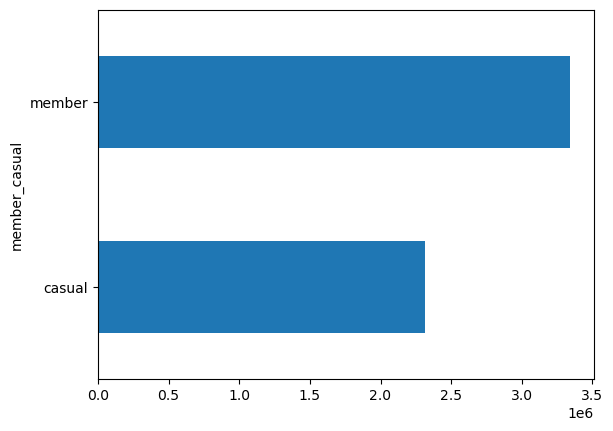

In [19]:
print(cyclists_cleaned.groupby('member_casual')['ride_id'].count())
cyclists_cleaned.groupby('member_casual')['ride_id'].count().plot(kind='barh')

### Bike type preference

member_casual  rideable_type
casual         classic_bike     1063443
               electric_bike    1252886
member         classic_bike     1708548
               electric_bike    1635729
Name: ride_id, dtype: int64


<Axes: xlabel='member_casual', ylabel='ride_id'>

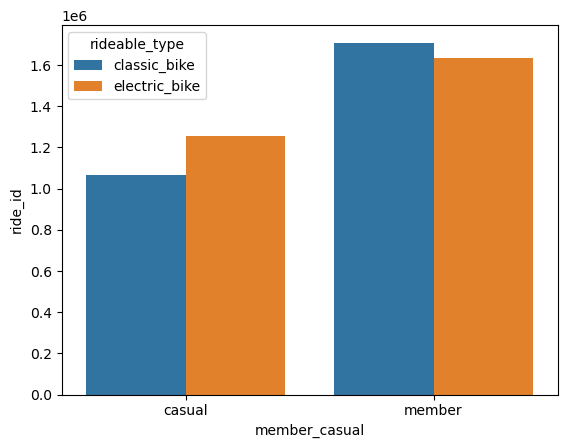

In [20]:
print(cyclists_cleaned.groupby(['member_casual', 'rideable_type'])['ride_id'].count())
grouped_data = cyclists_cleaned.groupby(['member_casual', 'rideable_type'])['ride_id'].count().reset_index()

# Plot the grouped data using seaborn
sns.barplot(x='member_casual', y='ride_id', hue='rideable_type', data=grouped_data)

### Amount of trips

#### Following the hours of the day

<Axes: xlabel='hours', ylabel='ride_id'>

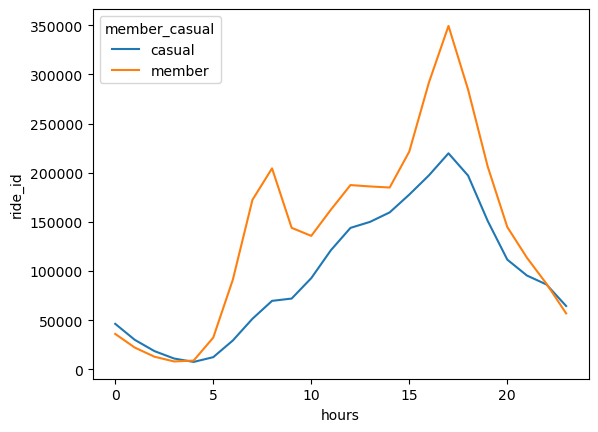

In [21]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'hours'])['ride_id'].count().reset_index()

# Plot the grouped data using seaborn
sns.lineplot(x='hours', y='ride_id', hue='member_casual', data=grouped_data)

<Axes: xlabel='hours', ylabel='ride_id'>

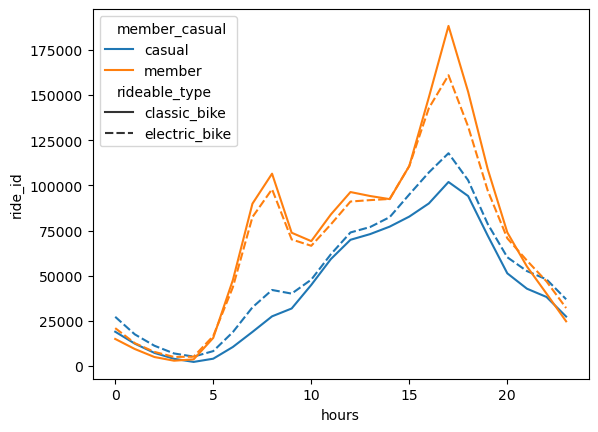

In [22]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'rideable_type', 'hours'])['ride_id'].count().reset_index()
sns.lineplot(x='hours', y='ride_id', hue='member_casual', style='rideable_type', data=grouped_data)

#### Following the days of the week

<Axes: xlabel='weekday_started', ylabel='ride_id'>

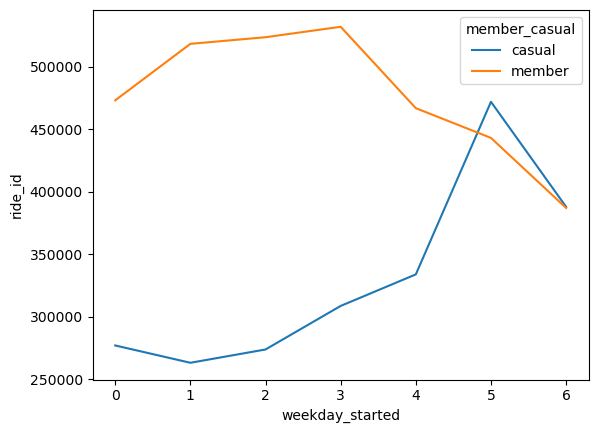

In [23]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'weekday_started'])['ride_id'].count().reset_index()

# Plot the grouped data using seaborn
sns.lineplot(x='weekday_started', y='ride_id', hue='member_casual', data=grouped_data)

<Axes: xlabel='weekday_started', ylabel='ride_id'>

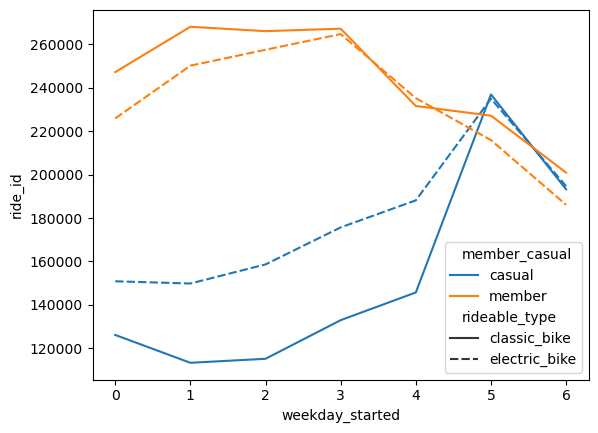

In [24]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'rideable_type', 'weekday_started'])['ride_id'].count().reset_index()
sns.lineplot(x='weekday_started', y='ride_id', hue='member_casual', style='rideable_type', data=grouped_data)

#### Following the months of the year

<Axes: xlabel='month_started', ylabel='ride_id'>

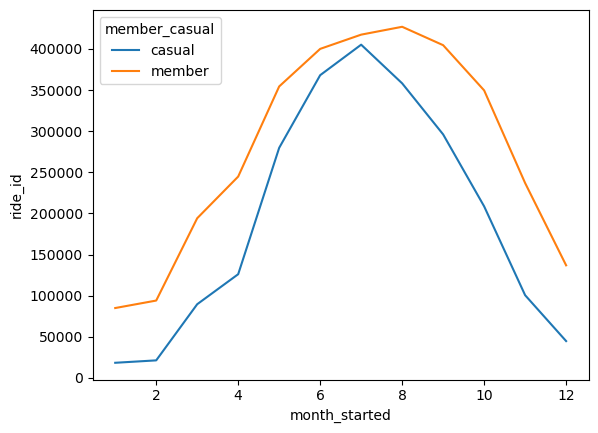

In [25]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'month_started'])['ride_id'].count().reset_index()

# Plot the grouped data using seaborn
sns.lineplot(x='month_started', y='ride_id', hue='member_casual', data=grouped_data)

<Axes: xlabel='month_started', ylabel='ride_id'>

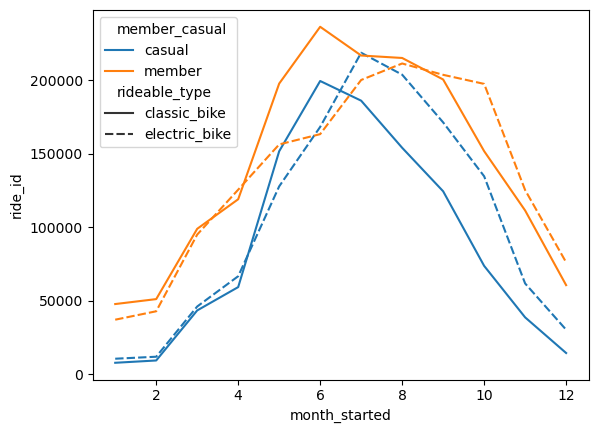

In [26]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'rideable_type', 'month_started'])['ride_id'].count().reset_index()
sns.lineplot(x='month_started', y='ride_id', hue='member_casual', style='rideable_type', data=grouped_data)

### Average Ride Time

#### Following the hours of the day

<Axes: xlabel='hours', ylabel='ride_time_minutes'>

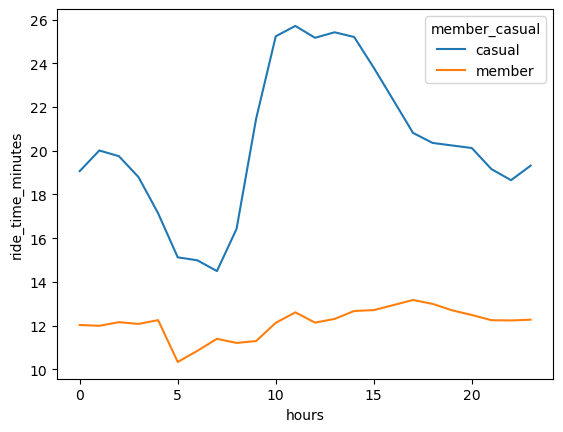

In [27]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'hours'])['ride_time_minutes'].mean().reset_index()

# Plot the grouped data using seaborn
sns.lineplot(x='hours', y='ride_time_minutes', hue='member_casual', data=grouped_data)

<Axes: xlabel='hours', ylabel='ride_time_minutes'>

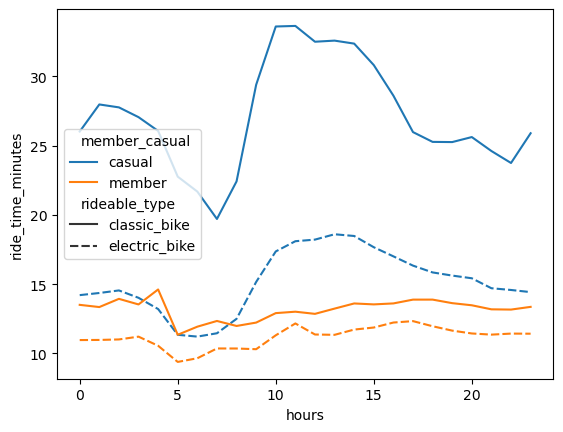

In [28]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'rideable_type', 'hours'])['ride_time_minutes'].mean().reset_index()
sns.lineplot(x='hours', y='ride_time_minutes', hue='member_casual', style='rideable_type', data=grouped_data)

#### Following the days of the week

<Axes: xlabel='weekday_started', ylabel='ride_time_minutes'>

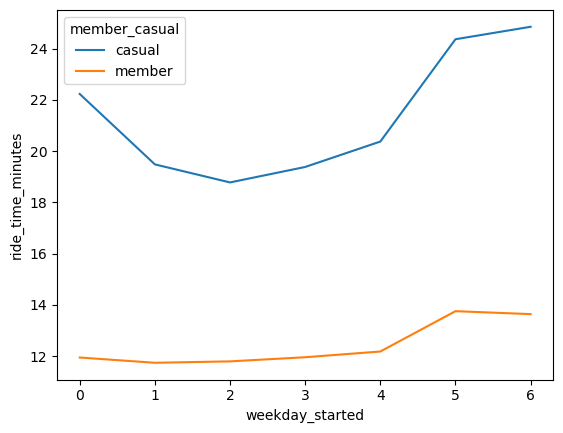

In [29]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'weekday_started'])['ride_time_minutes'].mean().reset_index()

# Plot the grouped data using seaborn
sns.lineplot(x='weekday_started', y='ride_time_minutes', hue='member_casual', data=grouped_data)

<Axes: xlabel='weekday_started', ylabel='ride_time_minutes'>

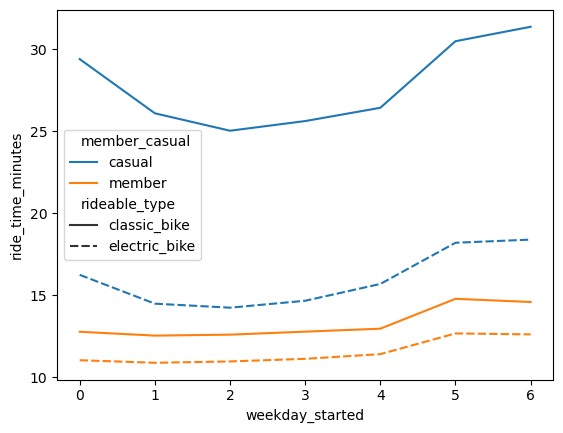

In [30]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'rideable_type', 'weekday_started'])['ride_time_minutes'].mean().reset_index()
sns.lineplot(x='weekday_started', y='ride_time_minutes', hue='member_casual', style='rideable_type', data=grouped_data)

#### Following the months of the year

<Axes: xlabel='month_started', ylabel='ride_time_minutes'>

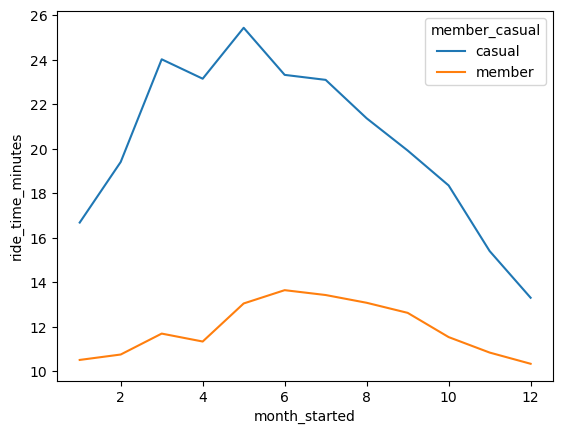

In [31]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'month_started'])['ride_time_minutes'].mean().reset_index()

# Plot the grouped data using seaborn
sns.lineplot(x='month_started', y='ride_time_minutes', hue='member_casual', data=grouped_data)

<Axes: xlabel='month_started', ylabel='ride_time_minutes'>

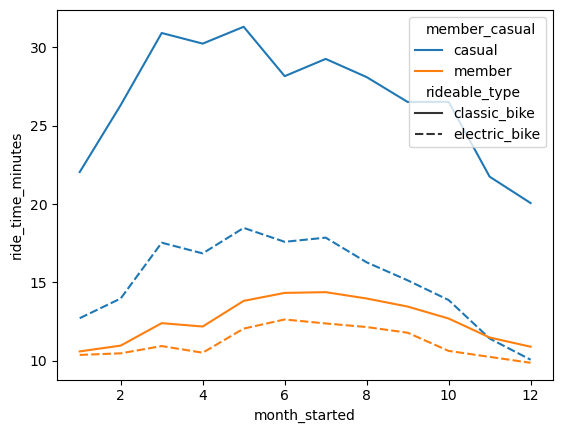

In [32]:
grouped_data = cyclists_cleaned.groupby(['member_casual', 'rideable_type', 'month_started'])['ride_time_minutes'].mean().reset_index()
sns.lineplot(x='month_started', y='ride_time_minutes', hue='member_casual', style='rideable_type', data=grouped_data)

### Geospatial analysis

<code>station_map = filtered_starting_station.groupby('start_station_name').first()</code>
<br><code>station_map = filtered_ending_station.groupby('end_station_name').first()</code>
<p style="font-size:15px; font-family:Helvetica;">These could be the two lines of code that might be challenging to understand in this section. You can look up the functions <code>groupby()</code> and <code>first()</code> on the internet. The reason I used them is that, after observing the dataset, I noticed that <code>start_lat</code> (or <code>end_lat</code>) and <code>start_lng</code> (or <code>end_lng</code>) are the same for each station. This is due to the use of GPS data, and you can imagine that renters might park at different locations within the same station. You could pick any station and then apply <code>.describe()</code> on these columns to see what I'm referring to. Thus, I chose <code>first()</code> to conveniently facilitate the subsequent popularity counting of a station in later steps.

#### Starting docking station location

In [33]:
starting_station = cyclists_cleaned[['member_casual','rideable_type','start_station_name','start_lat', 'start_lng']]
starting_station.head()

,member_casual,rideable_type,start_station_name,start_lat,start_lng
0,casual,electric_bike,GLENWOOD AVE & TOUHY AVE,42.012800,-87.665906
1,casual,electric_bike,GLENWOOD AVE & TOUHY AVE,42.012763,-87.665967
2,member,classic_bike,SHEFFIELD AVE & FULLERTON AVE,41.925602,-87.653708
3,casual,classic_bike,CLARK ST & BRYN MAWR AVE,41.983593,-87.669154
4,member,classic_bike,MICHIGAN AVE & JACKSON BLVD,41.877850,-87.624080


In [34]:
# Filter the DataFrame and create a mapping of station names to latitude and longitude
filtered_starting_station = starting_station[~(starting_station['start_station_name'] == 'On bike lock')]
station_map = filtered_starting_station.groupby('start_station_name').first()

# Create a mapping of station names to latitude and longitude
type_to_lat_map = station_map['start_lat'].to_dict()
type_to_lng_map = station_map['start_lng'].to_dict()

In [35]:
top_100_casual_classic_bike = starting_station.loc[
    (~(starting_station['start_station_name'] == 'On bike lock'))
     & (starting_station['member_casual'] == 'casual') & (starting_station['rideable_type'] == 'classic_bike')
    ]['start_station_name'].value_counts().nlargest(100).reset_index()

top_100_casual_classic_bike.rename(columns={'index': 'station_name', 'start_station_name': 'count'}, inplace=True)
top_100_casual_classic_bike['start_lat'] = top_100_casual_classic_bike['station_name'].map(type_to_lat_map)
top_100_casual_classic_bike['start_lng'] = top_100_casual_classic_bike['station_name'].map(type_to_lng_map)


top_100_casual_electric_bike = starting_station.loc[
    (starting_station["start_station_name"] == "On bike lock") 
    & (starting_station['member_casual'] == 'casual') 
    & (starting_station['rideable_type'] == 'electric_bike')
].groupby(['start_lat', 'start_lng'])['start_station_name'].count().nlargest(100).reset_index()
top_100_casual_electric_bike.rename(columns={'start_station_name': 'count'}, inplace=True)

top_100_casual_electric_bike['station_name'] = 'On bike lock'
top_100_casual_electric_bike['bike_type'] = 'electric_bike'
top_100_casual_electric_bike['member_casual'] = 'casual'

top_100_casual_classic_bike['bike_type'] = 'classic_bike'
top_100_casual_classic_bike['member_casual'] = 'casual'

In [36]:
top_100_member_classic_bike = starting_station.loc[
    (~(starting_station['start_station_name'] == 'On bike lock'))
     & (starting_station['member_casual'] == 'member') & (starting_station['rideable_type'] == 'classic_bike')
    ]['start_station_name'].value_counts().nlargest(100).reset_index()

top_100_member_classic_bike.rename(columns={'index': 'station_name', 'start_station_name': 'count'}, inplace=True)
top_100_member_classic_bike['start_lat'] = top_100_member_classic_bike['station_name'].map(type_to_lat_map)
top_100_member_classic_bike['start_lng'] = top_100_member_classic_bike['station_name'].map(type_to_lng_map)


top_100_member_electric_bike = starting_station.loc[
    (starting_station["start_station_name"] == "On bike lock") 
    & (starting_station['member_casual'] == 'member') 
    & (starting_station['rideable_type'] == 'electric_bike')
].groupby(['start_lat', 'start_lng'])['start_station_name'].count().nlargest(100).reset_index()
top_100_member_electric_bike.rename(columns={'start_station_name': 'count'}, inplace=True)

top_100_member_electric_bike['station_name'] = 'On bike lock'
top_100_member_electric_bike['bike_type'] = 'electric_bike'
top_100_member_electric_bike['member_casual'] = 'member'

top_100_member_classic_bike['bike_type'] = 'classic_bike'
top_100_member_classic_bike['member_casual'] = 'member'

In [37]:
top_100 = pd.concat([top_100_casual_classic_bike, top_100_casual_electric_bike, top_100_member_classic_bike, top_100_member_electric_bike], ignore_index=True)
#top_100.to_csv('top_100.csv', index=False)

#### Ending docking station location

In [38]:
ending_station = cyclists_cleaned[['member_casual','rideable_type','end_station_name','end_lat', 'end_lng']]
ending_station.head()

,member_casual,rideable_type,end_station_name,end_lat,end_lng
0,casual,electric_bike,CLARK ST & TOUHY AVE,42.012560,-87.674367
1,casual,electric_bike,CLARK ST & TOUHY AVE,42.012560,-87.674367
2,member,classic_bike,GREENVIEW AVE & FULLERTON AVE,41.925330,-87.665800
3,casual,classic_bike,PAULINA ST & MONTROSE AVE,41.961507,-87.671387
4,member,classic_bike,STATE ST & RANDOLPH ST,41.884621,-87.627834


In [39]:
# Filter the DataFrame and create a mapping of station names to latitude and longitude
filtered_ending_station = ending_station[~(ending_station['end_station_name'] == 'On bike lock')]
station_map = filtered_ending_station.groupby('end_station_name').first()

# Create a mapping of station names to latitude and longitude
type_to_lat_map = station_map['end_lat'].to_dict()
type_to_lng_map = station_map['end_lng'].to_dict()

In [40]:
top_100_casual_classic_bike = ending_station.loc[
    (~(ending_station['end_station_name'] == 'On bike lock'))
     & (ending_station['member_casual'] == 'casual') & (ending_station['rideable_type'] == 'classic_bike')
    ]['end_station_name'].value_counts().nlargest(100).reset_index()

top_100_casual_classic_bike.rename(columns={'index': 'station_name', 'end_station_name': 'count'}, inplace=True)
top_100_casual_classic_bike['end_lat'] = top_100_casual_classic_bike['station_name'].map(type_to_lat_map)
top_100_casual_classic_bike['end_lng'] = top_100_casual_classic_bike['station_name'].map(type_to_lng_map)


top_100_casual_electric_bike = ending_station.loc[
    (ending_station["end_station_name"] == "On bike lock") 
    & (ending_station['member_casual'] == 'casual') 
    & (ending_station['rideable_type'] == 'electric_bike')
].groupby(['end_lat', 'end_lng'])['end_station_name'].count().nlargest(100).reset_index()
top_100_casual_electric_bike.rename(columns={'end_station_name': 'count'}, inplace=True)

top_100_casual_electric_bike['station_name'] = 'On bike lock'
top_100_casual_electric_bike['bike_type'] = 'electric_bike'
top_100_casual_electric_bike['member_casual'] = 'casual'

top_100_casual_classic_bike['bike_type'] = 'classic_bike'
top_100_casual_classic_bike['member_casual'] = 'casual'

In [41]:
top_100_member_classic_bike = ending_station.loc[
    (~(ending_station['end_station_name'] == 'On bike lock'))
     & (ending_station['member_casual'] == 'member') & (ending_station['rideable_type'] == 'classic_bike')
    ]['end_station_name'].value_counts().nlargest(100).reset_index()

top_100_member_classic_bike.rename(columns={'index': 'station_name', 'end_station_name': 'count'}, inplace=True)
top_100_member_classic_bike['end_lat'] = top_100_member_classic_bike['station_name'].map(type_to_lat_map)
top_100_member_classic_bike['end_lng'] = top_100_member_classic_bike['station_name'].map(type_to_lng_map)


top_100_member_electric_bike = ending_station.loc[
    (ending_station["end_station_name"] == "On bike lock") 
    & (ending_station['member_casual'] == 'member') 
    & (ending_station['rideable_type'] == 'electric_bike')
].groupby(['end_lat', 'end_lng'])['end_station_name'].count().nlargest(100).reset_index()
top_100_member_electric_bike.rename(columns={'end_station_name': 'count'}, inplace=True)

top_100_member_electric_bike['station_name'] = 'On bike lock'
top_100_member_electric_bike['bike_type'] = 'electric_bike'
top_100_member_electric_bike['member_casual'] = 'member'

top_100_member_classic_bike['bike_type'] = 'classic_bike'
top_100_member_classic_bike['member_casual'] = 'member'

In [42]:
top_100 = pd.concat([top_100_casual_classic_bike, top_100_casual_electric_bike, top_100_member_classic_bike, top_100_member_electric_bike], ignore_index=True)
#top_100.to_csv('top_100_end_station.csv', index=False)

<div style="font-family: Helvetica; text-align: center; font-size:17px;">
    <h2 style="color: white;
           background-color: #ea4335;
           font-family: Helvetica;
           border-radius: 5px;
           letter-spacing: 0.5px;
           text-align: center;
           padding: 10px;">Conclusion<a class='anchor' id='conclusion'></a></h2>
    <p style="margin-left: 20px;">We've taken a comprehensive journey, starting with the introduction of the Cyclistic Bike-share Case Study, moving on to presenting the Divvy Dataset, and performing essential Data Wrangling steps like data cleaning and creating new columns/metrics. Afterward, we explored Data Analysis to uncover important insights, which were then used to drive data-informed decisions.  This is my first project, and I eagerly welcome your feedback. It is my sincere hope that this notebook proves beneficial to all. Thank you for taking the time to read through it ❤️❤️❤️. </p>
</div>